In [1]:
%autosave 90

Autosaving every 90 seconds


Name: Jishnu Chander Ravichanderan <br>
Github Username: jishnuchander <br>
USC ID: 1144843551 <br>

In [76]:
# Importing all required libraries
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import floor as fl
import seaborn as sns
from scipy.stats import variation
from sklearn.impute import SimpleImputer
# from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import scale, StandardScaler
from sklearn import model_selection
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss, mean_squared_error, roc_auc_score 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xg
from sklearn.model_selection import GridSearchCV, KFold
from xgboost import  XGBClassifier
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [15]:
path = os.getcwd()+"\Homework_6_Data\\aps_failure_training_set.csv"

In [16]:
train_df = pd.read_csv(path, skiprows=20)

In [17]:
train_df['class'].value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

In [18]:
def transform(b):
    if b=='neg':
        return 0
    else:
        return 1

In [19]:
train_df['class'] = train_df.apply(lambda row: transform(row['class']), axis=1)

In [20]:
train_df = train_df.replace({'na': np.nan})

In [21]:
train_df = train_df.astype(float)

In [22]:
train_df = train_df.fillna(train_df.mean())

In [23]:
train_df

class    aa_000    ab_000        ac_000         ad_000  ae_000  af_000  \
0        0.0   76698.0  0.713189  2.130706e+09     280.000000     0.0     0.0   
1        0.0   33058.0  0.713189  0.000000e+00  190620.639314     0.0     0.0   
2        0.0   41040.0  0.713189  2.280000e+02     100.000000     0.0     0.0   
3        0.0      12.0  0.000000  7.000000e+01      66.000000     0.0    10.0   
4        0.0   60874.0  0.713189  1.368000e+03     458.000000     0.0     0.0   
...      ...       ...       ...           ...            ...     ...     ...   
59995    0.0  153002.0  0.713189  6.640000e+02     186.000000     0.0     0.0   
59996    0.0    2286.0  0.713189  2.130707e+09     224.000000     0.0     0.0   
59997    0.0     112.0  0.000000  2.130706e+09      18.000000     0.0     0.0   
59998    0.0   80292.0  0.713189  2.130706e+09     494.000000     0.0     0.0   
59999    0.0   40222.0  0.713189  6.980000e+02     628.000000     0.0     0.0   

       ag_000  ag_001  ag_002  ...     ee_002    ee_003     ee_004     ee_005  \
0         0.0     0.0     0.0  ...  1240520.0  493384.0   721044.0   469792.0   
1         0.0     0.0     0.0  ...   421400.0  178064.0   293306.0   245416.0   
2         0.0     0.0     0.0  ...   277378.0  159812.0   423992.0   409564.0   
3         0.0     0.0     0.0  ...      240.0      46.0       58.0       44.0   
4         0.0     0.0     0.0  ...   622012.0  229790.0   405298.0   347188.0   
...       ...     ...     ...  ...        ...       ...        ...        ...   
59995     0.0     0.0     0.0  ...   998500.0  566884.0  1290398.0  1218244.0   
59996     0.0     0.0     0.0  ...    10578.0    6760.0    21126.0    68424.0   
59997     0.0     0.0     0.0  ...      792.0     386.0      452.0      144.0   
59998     0.0     0.0     0.0  ...   699352.0  222654.0   347378.0   225724.0   
59999     0.0     0.0     0.0  ...   440066.0  183200.0   344546.0   254068.0   

          ee_006    ee_007    ee_008    ee_009  ef_000  eg_000  
0       339156.0  157956.0   73224.0       0.0     0.0     0.0  
1       133654.0   81140.0   97576.0    1500.0     0.0     0.0  
2       320746.0  158022.0   95128.0     514.0     0.0     0.0  
3           10.0       0.0       0.0       0.0     4.0    32.0  
4       286954.0  311560.0  433954.0    1218.0     0.0     0.0  
...          ...       ...       ...       ...     ...     ...  
59995  1019768.0  717762.0  898642.0   28588.0     0.0     0.0  
59996      136.0       0.0       0.0       0.0     0.0     0.0  
59997      146.0    2622.0       0.0       0.0     0.0     0.0  
59998   194440.0  165070.0  802280.0  388422.0     0.0     0.0  
59999   225148.0  158304.0  170384.0     158.0     0.0     0.0  

[60000 rows x 171 columns]

In [24]:
test_path = os.getcwd()+"\Homework_6_Data\\aps_failure_test_set.csv"

In [25]:
test_df = pd.read_csv(test_path, skiprows=20)

In [26]:
test_df['class'] = test_df.apply(lambda row: transform(row['class']), axis=1)

In [27]:
test_df = test_df.replace({'na': np.nan})

In [28]:
test_df = test_df.astype(float)

In [29]:
test_df = test_df.fillna(test_df.mean())

In [30]:
df = pd.concat([train_df, test_df])

In [31]:
df['class'].value_counts()

0.0    74625
1.0     1375
Name: class, dtype: int64

In [32]:
X = df.iloc[:, 1:]
Y = df['class']

In [34]:
coeff_varitaion_result = []
for col in X:
    var = variation(X[col], axis = 0)
    coeff_varitaion_result.append((col, var))

In [35]:
for i, j in coeff_varitaion_result:
    print("The coefficient of variation in feature "+str(i)+" is: "+str(j))

The coefficient of variation in feature aa_000 is: 4.3285793576589375
The coefficient of variation in feature ab_000 is: 2.178382993107652
The coefficient of variation in feature ac_000 is: 2.1676341493152718
The coefficient of variation in feature ad_000 is: 206.78544890713593
The coefficient of variation in feature ae_000 is: 22.293851472260993
The coefficient of variation in feature af_000 is: 18.209241533926136
The coefficient of variation in feature ag_000 is: 91.46491872031368
The coefficient of variation in feature ag_001 is: 42.08006335049054
The coefficient of variation in feature ag_002 is: 17.624811379932634
The coefficient of variation in feature ag_003 is: 8.753011622424856
The coefficient of variation in feature ag_004 is: 5.475013724232895
The coefficient of variation in feature ag_005 is: 2.964192766402933
The coefficient of variation in feature ag_006 is: 2.3525666449383458
The coefficient of variation in feature ag_007 is: 2.8124753467388834
The coefficient of variati

In [36]:
corrMatrix = X.corr()
corrMatrix.style.background_gradient(cmap='coolwarm')

In [37]:
coeff_best = sorted(coeff_varitaion_result, key = lambda x: x[1], reverse=True)[:13]
cols = [x[0] for x in coeff_best]

In [38]:
X_selected = X[cols]

In [39]:
# assigning colors to the class labels for plotting scatter and box plots
labels = Y.tolist()
colors = []

for i in labels:
    if i == 0:
        colors.append('red')
    else:
        colors.append('blue')

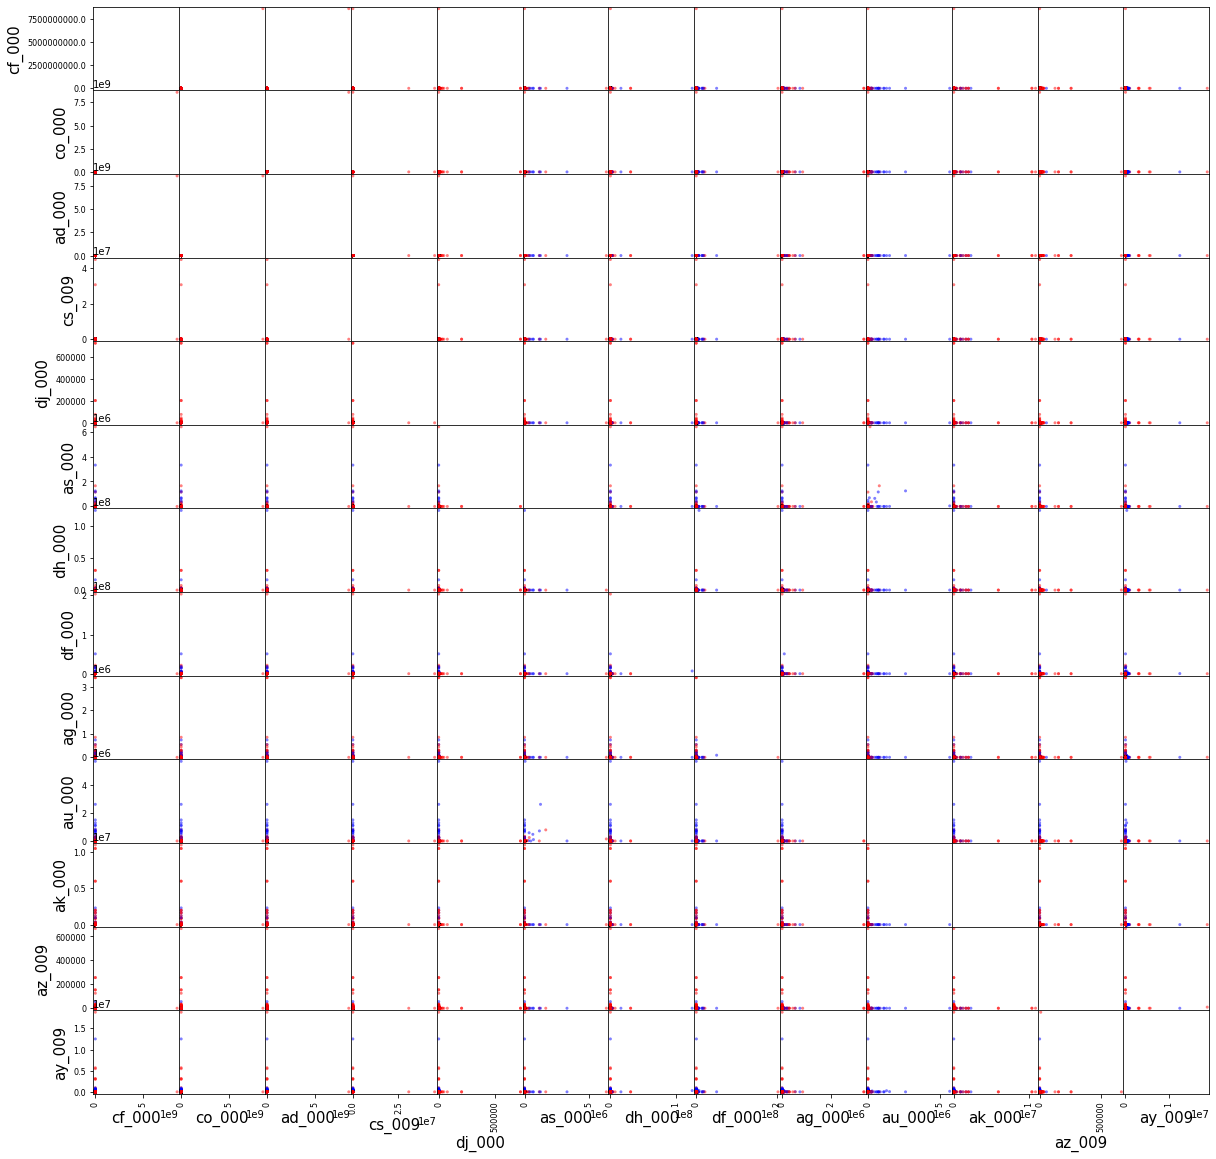

In [40]:
# plotting scatter plots of the independent variables

scatter_matrix = pd.plotting.scatter_matrix(X_selected, figsize=(20, 20), color=colors, diagonal=None)
for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 15, rotation = 0)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 15, rotation = 90)
plt.show()

In [41]:
selected_cols = cols

In [42]:
selected_cols.append('class')
selected_cols

['cf_000',
 'co_000',
 'ad_000',
 'cs_009',
 'dj_000',
 'as_000',
 'dh_000',
 'df_000',
 'ag_000',
 'au_000',
 'ak_000',
 'az_009',
 'ay_009',
 'class']

In [43]:
df_selected = df[selected_cols]

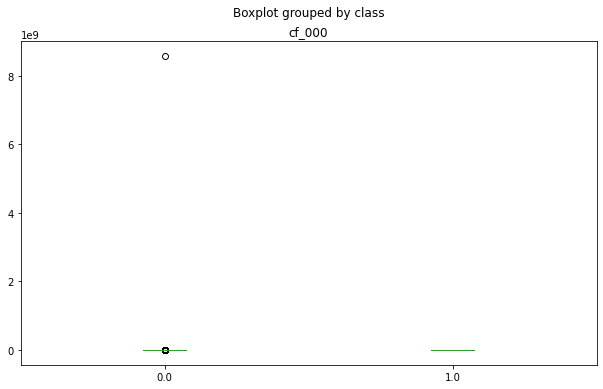

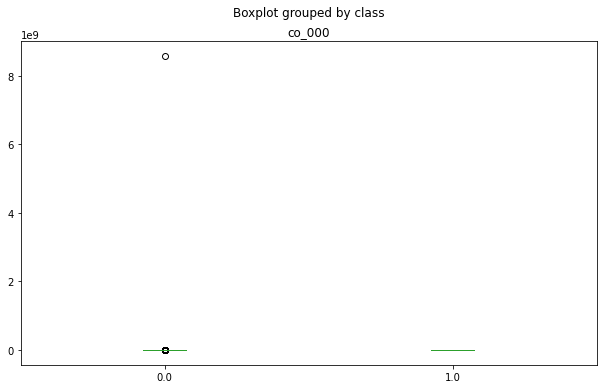

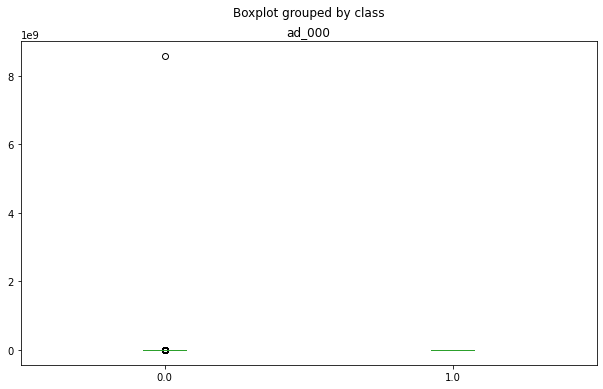

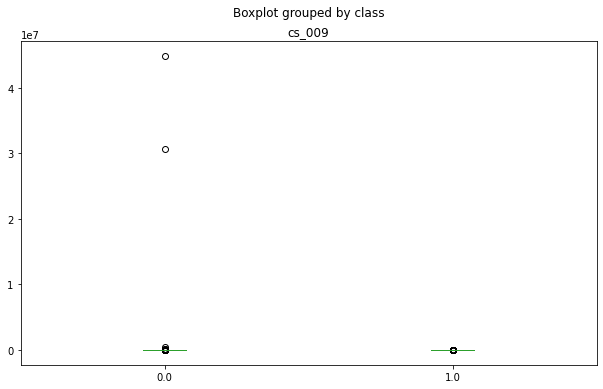

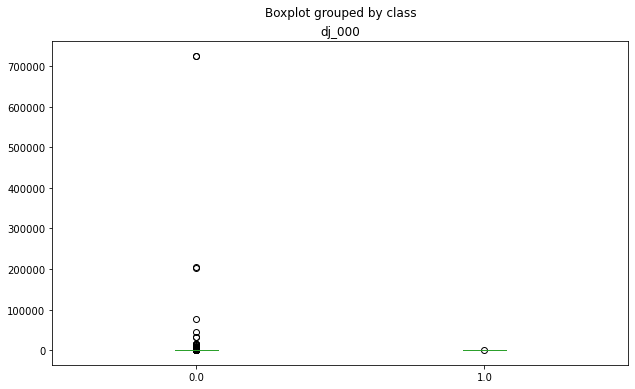

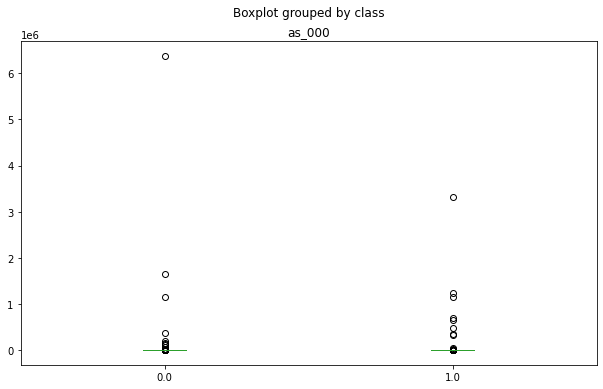

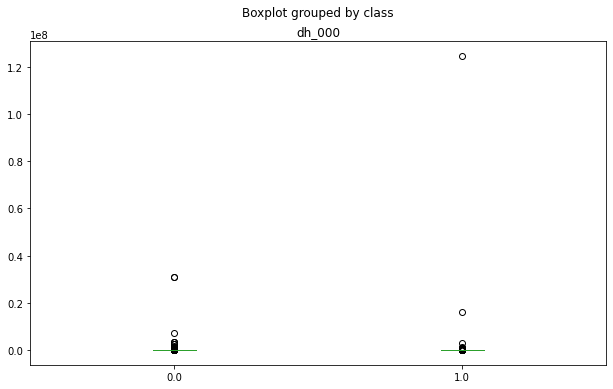

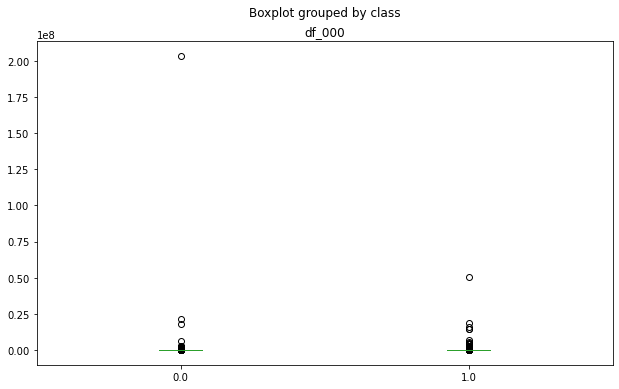

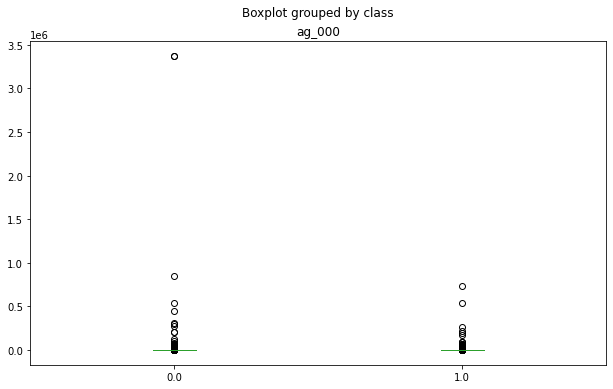

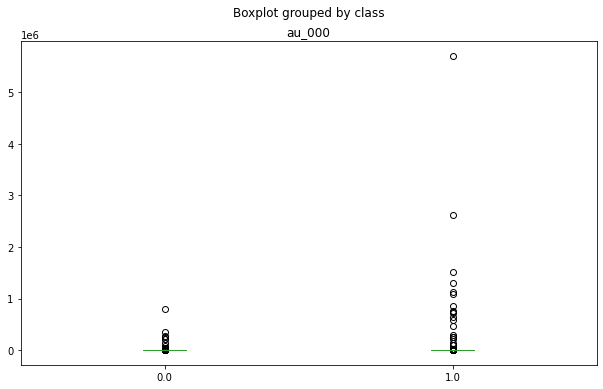

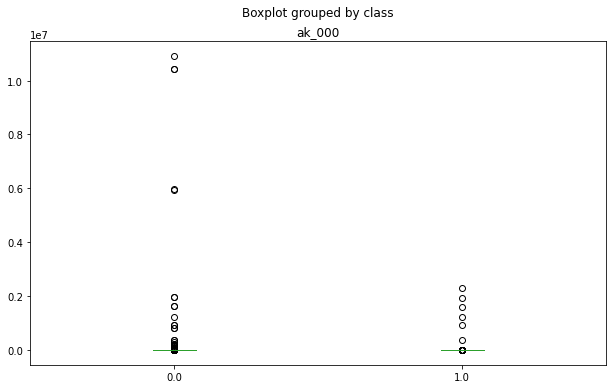

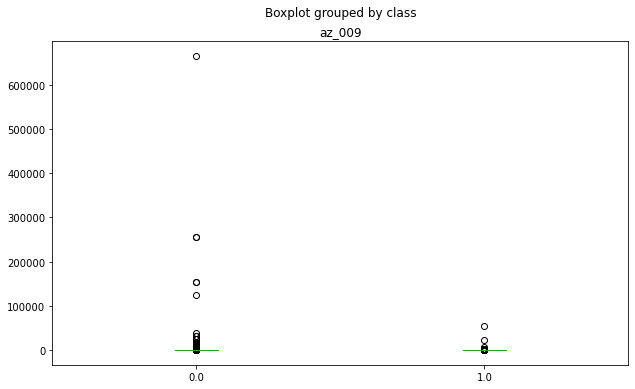

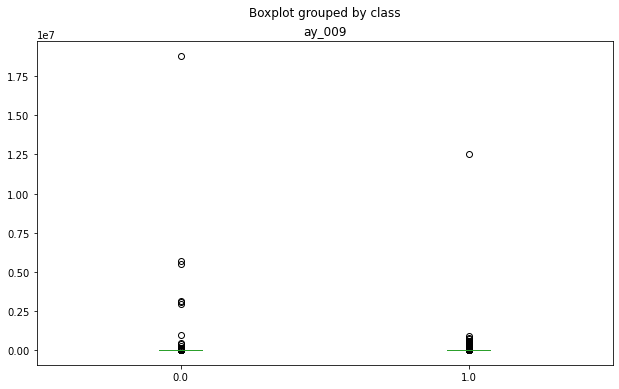

In [44]:
# plotting boxplots of the independent variables grouped by labels

for i in cols[:13]:
    bp_dict = df_selected.boxplot(column=i, by='class', figsize=(10, 6), return_type='both', patch_artist=True, grid=False)
    colors = ['r', 'b']
    for row_key, (ax,row) in bp_dict.iteritems():
        ax.set_xlabel('')
        for i,box in enumerate(row['boxes']):
            box.set_facecolor(colors[i])
    plt.show()

##### No, scatterplots are not of much use as all the correlations cannot be identified with the scatterplots . Boxplots are helpful to understand the distribution of the data, only few correaltions can be indentified by the scatterplots.

In [45]:
df['class'].value_counts()

0.0    74625
1.0     1375
Name: class, dtype: int64

##### Yes, the dataset is heavily imbalanced because there are 74625 rows in negative class and only 1375 which are in positive class.

In [46]:
train_df

class    aa_000    ab_000        ac_000         ad_000  ae_000  af_000  \
0        0.0   76698.0  0.713189  2.130706e+09     280.000000     0.0     0.0   
1        0.0   33058.0  0.713189  0.000000e+00  190620.639314     0.0     0.0   
2        0.0   41040.0  0.713189  2.280000e+02     100.000000     0.0     0.0   
3        0.0      12.0  0.000000  7.000000e+01      66.000000     0.0    10.0   
4        0.0   60874.0  0.713189  1.368000e+03     458.000000     0.0     0.0   
...      ...       ...       ...           ...            ...     ...     ...   
59995    0.0  153002.0  0.713189  6.640000e+02     186.000000     0.0     0.0   
59996    0.0    2286.0  0.713189  2.130707e+09     224.000000     0.0     0.0   
59997    0.0     112.0  0.000000  2.130706e+09      18.000000     0.0     0.0   
59998    0.0   80292.0  0.713189  2.130706e+09     494.000000     0.0     0.0   
59999    0.0   40222.0  0.713189  6.980000e+02     628.000000     0.0     0.0   

       ag_000  ag_001  ag_002  ...     ee_002    ee_003     ee_004     ee_005  \
0         0.0     0.0     0.0  ...  1240520.0  493384.0   721044.0   469792.0   
1         0.0     0.0     0.0  ...   421400.0  178064.0   293306.0   245416.0   
2         0.0     0.0     0.0  ...   277378.0  159812.0   423992.0   409564.0   
3         0.0     0.0     0.0  ...      240.0      46.0       58.0       44.0   
4         0.0     0.0     0.0  ...   622012.0  229790.0   405298.0   347188.0   
...       ...     ...     ...  ...        ...       ...        ...        ...   
59995     0.0     0.0     0.0  ...   998500.0  566884.0  1290398.0  1218244.0   
59996     0.0     0.0     0.0  ...    10578.0    6760.0    21126.0    68424.0   
59997     0.0     0.0     0.0  ...      792.0     386.0      452.0      144.0   
59998     0.0     0.0     0.0  ...   699352.0  222654.0   347378.0   225724.0   
59999     0.0     0.0     0.0  ...   440066.0  183200.0   344546.0   254068.0   

          ee_006    ee_007    ee_008    ee_009  ef_000  eg_000  
0       339156.0  157956.0   73224.0       0.0     0.0     0.0  
1       133654.0   81140.0   97576.0    1500.0     0.0     0.0  
2       320746.0  158022.0   95128.0     514.0     0.0     0.0  
3           10.0       0.0       0.0       0.0     4.0    32.0  
4       286954.0  311560.0  433954.0    1218.0     0.0     0.0  
...          ...       ...       ...       ...     ...     ...  
59995  1019768.0  717762.0  898642.0   28588.0     0.0     0.0  
59996      136.0       0.0       0.0       0.0     0.0     0.0  
59997      146.0    2622.0       0.0       0.0     0.0     0.0  
59998   194440.0  165070.0  802280.0  388422.0     0.0     0.0  
59999   225148.0  158304.0  170384.0     158.0     0.0     0.0  

[60000 rows x 171 columns]

In [54]:
X_train = train_df.iloc[::, 1:]
Y_train = train_df['class']
X_test = test_df.iloc[::, 1:]
Y_test = test_df['class']

In [55]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(60000, 170) (16000, 170) (60000,) (16000,)


In [57]:
rf = RandomForestClassifier(oob_score=True, n_estimators=200)
rf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=200, oob_score=True)

In [58]:
Y_pred_train = rf.predict(X_train)
Y_pred = rf.predict(X_test)
print(accuracy_score(Y_pred_train, Y_train))
print(1 - accuracy_score(Y_pred, Y_test))

1.0
0.992125


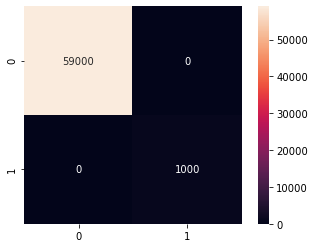

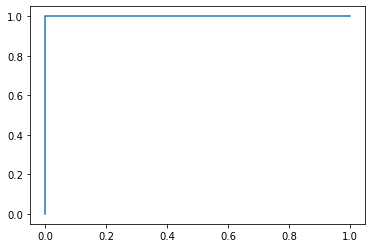

In [59]:
cm = confusion_matrix(Y_train, Y_pred_train)
sns.heatmap(cm,square= True, annot=True, fmt='g')
plt.show()

print(roc_auc_score(Y_train, Y_pred_train))

Y_score = rf.predict_proba(X_train)[::, 1]

fpr, tpr, _ = roc_curve(Y_train, Y_score)

plt.plot(fpr, tpr)
plt.show()

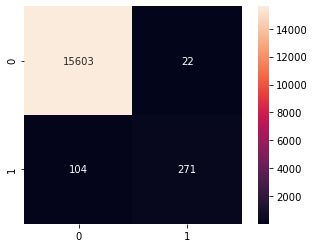

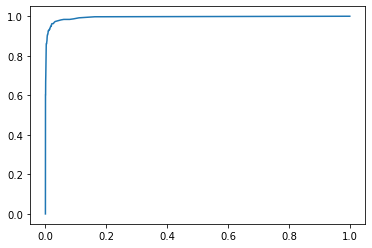

In [60]:
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm,square= True, annot=True, fmt='g')
plt.show()

print(roc_auc_score(Y_test, Y_pred))

Y_score = rf.predict_proba(X_test)[::, 1]

fpr, tpr, _ = roc_curve(Y_test, Y_score)

plt.plot(fpr, tpr)
plt.show()

In [61]:
print('Out of bag error: ', 1 - rf.oob_score_)

Out of bag error:  0.00605


In [62]:
rf = RandomForestClassifier(random_state=42, oob_score=True, n_jobs=-1, n_estimators=200, class_weight="balanced")
rf.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       oob_score=True, random_state=42)

In [63]:
Y_pred_train = rf.predict(X_train)
Y_pred = rf.predict(X_test)
print(accuracy_score(Y_pred_train, Y_train))
print(1 - accuracy_score(Y_pred, Y_test))

1.0
0.988875


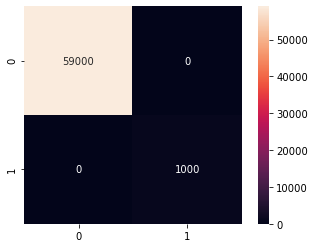

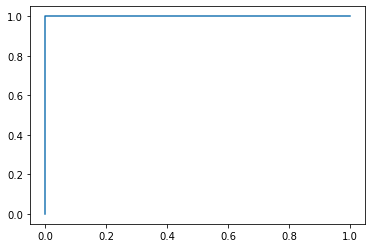

In [64]:
cm = confusion_matrix(Y_train, Y_pred_train)
sns.heatmap(cm,square= True, annot=True, fmt='g')
plt.show()

print(roc_auc_score(Y_train, Y_pred_train))

Y_score = rf.predict_proba(X_train)[::, 1]

fpr, tpr, _ = roc_curve(Y_train, Y_score)

plt.plot(fpr, tpr)
plt.show()

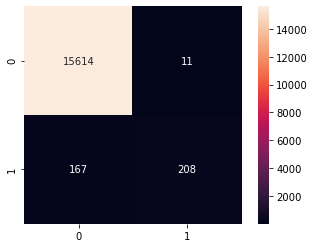

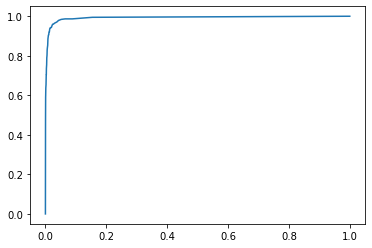

In [65]:
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm,square= True, annot=True, fmt='g')
plt.show()

print(roc_auc_score(Y_test, Y_pred))

Y_score = rf.predict_proba(X_test)[::, 1]

fpr, tpr, _ = roc_curve(Y_test, Y_score)

plt.plot(fpr, tpr)
plt.show()

In [66]:
print('Out of bag error: ', 1 - rf.oob_score_)

Out of bag error:  0.007583333333333386


##### Though the misclassification rate, accuracy and oob_error are higher for this model with weights balanced than the previous model with weights not balanced , this model is more reasonable as it compensates the imbalance in dataset through the weights, with this model we are less at risk of overfitting.

In [67]:
kf = KFold(n_splits=5)

param = {'reg_alpha': [0.01, 0.1, 1, 1.5, 10, 100]}
clf=XGBClassifier(random_state=42,objective='binary:logistic', n_estimators=200, verbosity=0, silent=True, use_label_encoder=False, eval_metric='logloss')

gsv = GridSearchCV(clf, param, cv=kf,verbose=0,scoring='roc_auc', n_jobs=-1)
gsv.fit(X_train,Y_train)

print("XBGClassifier")
print("Best HyperParameter: ",gsv.best_params_)
print('Best CV Score for best lambda:', gsv.best_score_)
print('CV Error rate for best lambda:', 1 - gsv.best_score_)

XBGClassifier
Best HyperParameter:  {'reg_alpha': 1}
Best CV Score for best lambda: 0.9901432872519405
CV Error rate for best lambda: 0.009856712748059548


In [68]:
clf = XGBClassifier(random_state=0,objective='binary:logistic', n_estimators=200, verbosity=0, reg_alpha=gsv.best_params_['reg_alpha'], eval_metric='logloss')
clf.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=1, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)

In [69]:
Y_pred_train = clf.predict(X_train)
Y_pred = clf.predict(X_test)
print(accuracy_score(Y_pred_train, Y_train))
print(1 - accuracy_score(Y_pred, Y_test))

0.9999833333333333
0.99425


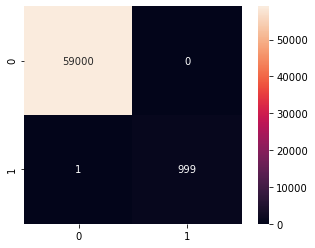

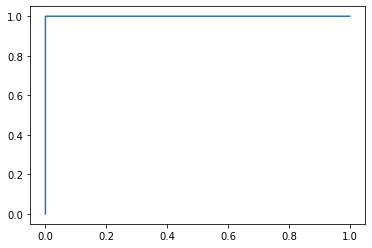

In [70]:
cm = confusion_matrix(Y_train, Y_pred_train)
sns.heatmap(cm,square= True, annot=True, fmt='g')
plt.show()

print(roc_auc_score(Y_train, Y_pred_train))

Y_score = clf.predict_proba(X_train)[::, 1]

fpr, tpr, _ = roc_curve(Y_train, Y_score)

plt.plot(fpr, tpr)
plt.show()

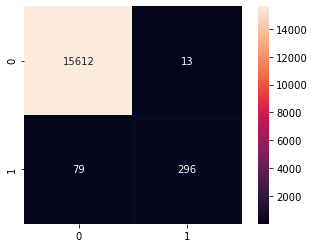

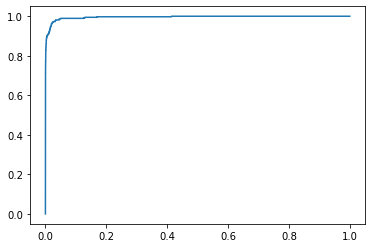

In [71]:
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm,square= True, annot=True, fmt='g')
plt.show()

print(roc_auc_score(Y_test, Y_pred))

Y_score = clf.predict_proba(X_test)[::, 1]

fpr, tpr, _ = roc_curve(Y_test, Y_score)

plt.plot(fpr, tpr)
plt.show()

##### Train error rate is almost negligible, test error rate is lesser when compared to CV error rate, so with the best CV score we obtained, we are able to train model to obtain the best possible test error rate for the imbalanced data.

In [72]:
# cols=train_data.columns.drop('class')
cols = X.columns
smote = SMOTE(random_state=0)
smote_X_train, smote_Y_train = smote.fit_resample(X_train, Y_train)
smote_X_train = pd.DataFrame(smote_X_train, columns=cols)
smote_Y_train = pd.DataFrame(smote_Y_train, columns=['class'])

In [73]:
smote_Y_train.value_counts()

class
0.0      59000
1.0      59000
dtype: int64

In [77]:
# right way
# 1. Iterate over each lambda value
# 2. Apply SMOTE to each split
# 3. Find mean of f1 score for each lambda
# 4. Choose the lambda with highest f1 score

alphas=[0.01, 0.1, 1, 1.5, 10, 100]
best_alpha = 0
best_score = 0
xg_f1 = []

for alpha in alphas:
    smoter = SMOTE(random_state=42)
    print('alpha', alpha)

    kf = KFold(n_splits=5)
    avg_f1 = []

    for train_index,test_index in kf.split(X_train):
        
        x_train_xg, test_x = X_train.iloc[train_index.tolist(),:], X_train.iloc[test_index.tolist(),:]
        y_train_xg, test_y = np.array(Y_train)[train_index.tolist()], np.array(Y_train)[test_index.tolist()]
        
        X_train_fold_upsample, y_train_fold_upsample = smoter.fit_resample(x_train_xg, y_train_xg)
        
        xgb = XGBClassifier(random_state=42,reg_alpha=alpha, objective='binary:logistic', verbosity=0, n_jobs=-1, eval_metric='logloss')
        xgb.fit(X_train_fold_upsample,y_train_fold_upsample)
        
        pred = xgb.predict(test_x)
        f1 = f1_score(test_y, pred)
        
        avg_f1.append(f1)

    xg_f1.append(np.mean(avg_f1))

    if np.mean(avg_f1) > best_score:
        best_score = np.mean(avg_f1)
        best_alpha = alpha

print(best_alpha)

alpha 0.01
alpha 0.1
alpha 1
alpha 1.5
alpha 10
alpha 100
0.01


In [78]:
print('Best alpha: ',best_alpha)
print('Best CV score using f1_score:', best_score)
print('CV error:', 1 - best_score)

Best alpha:  0.01
Best CV score using f1_score: 0.8110732188359122
CV error: 0.1889267811640878


In [80]:
clf = XGBClassifier(random_state=42,objective='binary:logistic', n_estimators=200, verbosity=0, reg_alpha=best_alpha, n_jobs=-1, eval_metric='logloss')
clf.fit(smote_X_train, smote_Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)

In [83]:
Y_pred_train = clf.predict(smote_X_train)
Y_pred = clf.predict(X_test)
print(accuracy_score(Y_pred_train, smote_Y_train))
print(1 - accuracy_score(Y_pred, Y_test))

1.0
0.9844375


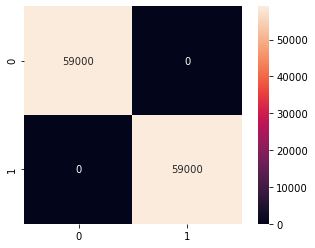

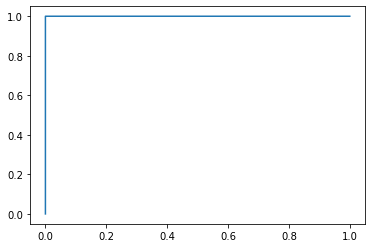

In [85]:
cm = confusion_matrix(smote_Y_train, Y_pred_train)
sns.heatmap(cm,square= True, annot=True, fmt='g')
plt.show()

print(roc_auc_score(smote_Y_train, Y_pred_train))

Y_score = clf.predict_proba(smote_X_train)[::, 1]

fpr, tpr, _ = roc_curve(smote_Y_train, Y_score)

plt.plot(fpr, tpr)
plt.show()

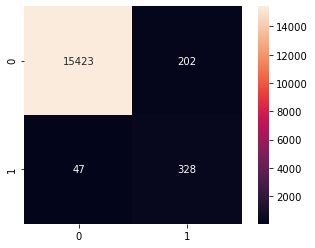

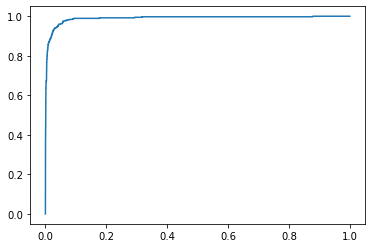

In [86]:
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm,square= True, annot=True, fmt='g')
plt.show()

print(roc_auc_score(Y_test, Y_pred))

Y_score = clf.predict_proba(X_test)[::, 1]

fpr, tpr, _ = roc_curve(Y_test, Y_score)

plt.plot(fpr, tpr)
plt.show()

##### The test accuracy and misclassification rate of imbalanced data is less compared to the one's we observed in SMOTE but SMOTE is more accurate as it upscales the minority class and now each class has equal number of points.

![HW6_1.jpeg](HW6_1.jpeg)

![HW6_2.jpeg](HW6_2.jpeg)

![HW6_3.jpeg](HW6_3.jpeg)

![HW6_4.jpeg](HW6_4.jpeg)

![HW6_5.jpeg](HW6_5.jpeg)